In [1]:
# email: sengtian@yahoo.com
#
# dataset:
#    1) dataset/load_prediction_train.csv
#    2) https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/?utm_source=auto-email


In [2]:
%config IPCompleter.greedy=True

import pandas as pd
import os

# to display all the columns of the dataframe in the notebook
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


In [3]:
# load the dataset
dataset_dir = 'dataset'
dataset_filename = 'loan_prediction_train.csv'

dataset_fullname = os.path.join(os.getcwd(), dataset_dir)
dataset_fullname = os.path.join(dataset_fullname, dataset_filename)

print(dataset_fullname)

# load the data and print the first few rows
df = pd.read_csv(dataset_fullname)
df.head(10)


C:\Users\SengTian\Downloads\Temp\Machine Learning\Python\Analytics_Vidhya_Loan_Prediction\dataset\loan_prediction_train.csv


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
# print the shape of the training csv file
# (row, column)
df.shape


(614, 13)

# Data Analysis

In [5]:
# drop the Loan_ID since it will not be needed in training and prediction
df = df.drop('Loan_ID', axis=1)

# print the data type of each column
df.dtypes


Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
# numerical value columns:

df.describe()

# all numerical columns have missing values except ApplicantIncome


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
# categorical value columns:
for cat_var in [var for var in df.columns if df[var].dtypes == 'O']:
    print('{} = {}'.format(cat_var, df[cat_var].unique()))


Gender = ['Male' 'Female' nan]
Married = ['No' 'Yes' nan]
Dependents = ['0' '1' '2' '3+' nan]
Education = ['Graduate' 'Not Graduate']
Self_Employed = ['No' 'Yes' nan]
Property_Area = ['Urban' 'Rural' 'Semiurban']
Loan_Status = ['Y' 'N']


# Split the data for training and testing

In [8]:
from sklearn.model_selection import train_test_split

X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Create Pipeline 

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [10]:
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object']).drop(['Loan_Status'], axis=1).columns


In [11]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_features),
        ('category', categorical_transformer, categorical_features)
    ]
)


In [12]:
from sklearn.ensemble import RandomForestClassifier

rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])


# Train the model

In [13]:
rf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numeric',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                         

# Prediction

In [14]:
y_pred = rf.predict(X_test)

In [15]:
from sklearn import metrics

# print the model accuracy - how often is the classifier correct ?
print("Accuracy:", round(metrics.accuracy_score(y_test, y_pred), 4))

Accuracy: 0.7642


# Model Discovery

In [16]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
   KNeighborsClassifier(3),
   SVC(kernel="rbf", C=0.025, probability=True),
   NuSVC(probability=True),
   DecisionTreeClassifier(),
   RandomForestClassifier(),
   AdaBoostClassifier(),
   GradientBoostingClassifier()
]

print('--------------------------------')
for classifier in classifiers:
   pipe = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', classifier)])
   p = pipe.fit(X_train, y_train)
   print(classifier.__class__.__name__)
   print("model score: %.3f" % p.score(X_test, y_test))
   print('--------------------------------')

--------------------------------
KNeighborsClassifier
model score: 0.756
--------------------------------
SVC
model score: 0.732
--------------------------------
NuSVC
model score: 0.829
--------------------------------
DecisionTreeClassifier
model score: 0.667
--------------------------------
RandomForestClassifier
model score: 0.797
--------------------------------
AdaBoostClassifier
model score: 0.813
--------------------------------
GradientBoostingClassifier
model score: 0.813
--------------------------------


In [17]:
# NuSVC has the highest score (0.829)

# nuSVC Classifier

In [18]:
nuSVC = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', NuSVC(probability=True))
])

nuSVC.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Accuracy:", round(metrics.accuracy_score(y_test, y_pred), 4))

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numeric',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                         

Accuracy: 0.7642


In [19]:
# Both Random Forest and nuSVC have the same score

# Test with loan_prediction_test.csv

In [20]:
# load the dataset
dataset_dir = 'dataset'
dataset_filename = 'loan_prediction_test.csv'

dataset_fullname = os.path.join(os.getcwd(), dataset_dir)
dataset_fullname = os.path.join(dataset_fullname, dataset_filename)

print(dataset_fullname)

# load the data and print the first few rows
t_df = pd.read_csv(dataset_fullname)
t_df.head(10)


C:\Users\SengTian\Downloads\Temp\Machine Learning\Python\Analytics_Vidhya_Loan_Prediction\dataset\loan_prediction_test.csv


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [21]:
# print the shape of the training csv file
# (row, column)
t_df.shape


(367, 12)

In [22]:
loan_id_list = t_df.Loan_ID.to_list()


In [23]:
# drop the Load_ID as it is of no use to prediction
t_df = t_df.drop('Loan_ID', axis=1)

t_df.shape

(367, 11)

In [24]:
loan_pred_list = rf.predict(t_df)

print(loan_pred_list)

['Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'N' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'N' 'Y'
 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y'
 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'Y' 'N'
 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'Y' 'N' 'Y'
 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'Y

In [25]:
submission = pd.DataFrame()
submission['Loan_ID'] = loan_id_list
submission['Loan_Status'] = loan_pred_list

t_dataset_dir = 'dataset'
t_dataset_filename = 'loan_prediction_submission.csv'

t_dataset_fullname = os.path.join(os.getcwd(), dataset_dir)
t_dataset_fullname = os.path.join(t_dataset_fullname, t_dataset_filename)

submission.to_csv(t_dataset_fullname, index=False)

print('Prediction result is written to:\n{}'.format(t_dataset_fullname))

Prediction result is written to:
C:\Users\SengTian\Downloads\Temp\Machine Learning\Python\Analytics_Vidhya_Loan_Prediction\dataset\loan_prediction_submission.csv


In [26]:
# Achieved a score of 0.7361

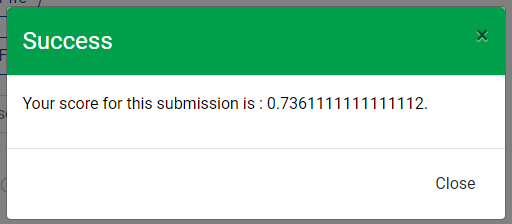